####################################################
TRATAMENTO DE DADOS DOS ARQUIVOS DE SAÍDA DO SERPENT
####################################################

Este programa foi desenvolvido com o intuito de realizar
o tratamento de dados dos arquivos de saída _dep.m e _res.m do Serpent.

Certifique-se que que esses arquivos foram importados no
ambiente de execução e estão renomeados de acordo com o nome escolhido para o(s) núcleo(s).
Se necessário, renomei-os.
Se houver dúvidas, pesquise como importar arquivos no Google Colab.

-> Inserir um a um o nome dos núcleos dos reatores a serem analisados
   de acordo com seus respectivos arquivos de final '_dep.m' e '_res.m'.
   Ex.: se os arquivos têm nome urex_Th90_dep.m e urex_Th90_res.m ---> inserir urex_Th90,
   que também será o nome do núcleo nas legendas dos gráficos.
   Insira . (ponto final) para encerrar.

   NÚCLEOS DOS REATORES:
   Padrão
   Ganex-Th95,5
   Urex-Th95,63
   .

-> Inserir um a um os nuclídeos para os gráficos de ma

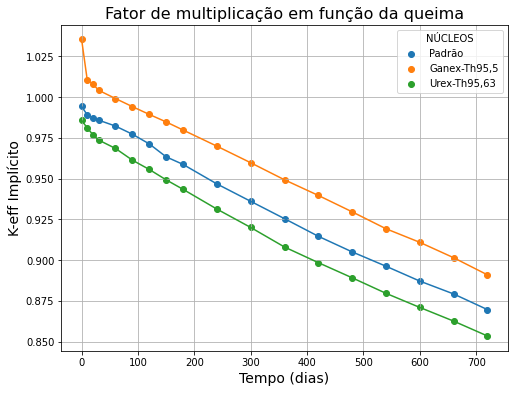

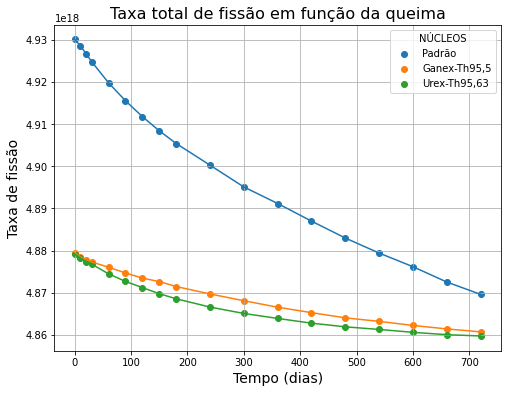

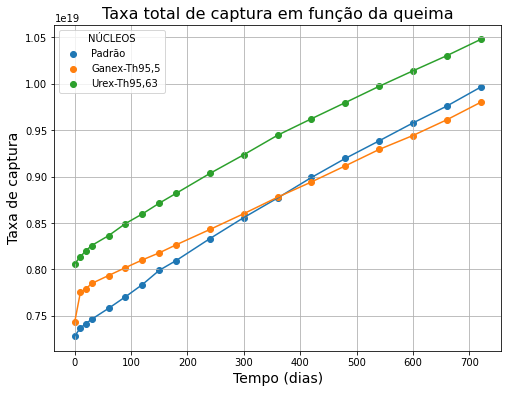

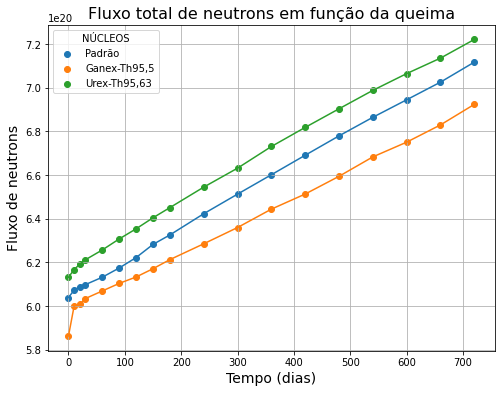

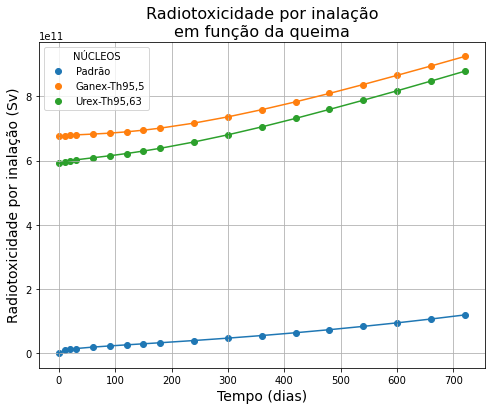

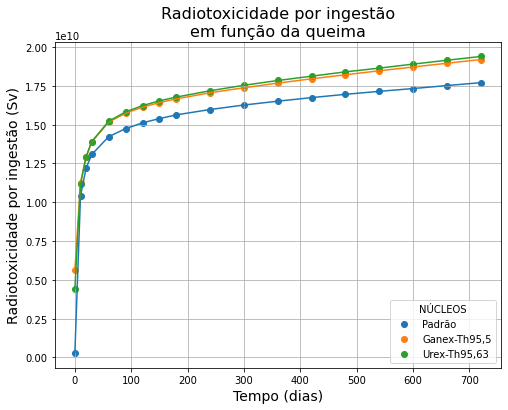



VARIAÇÕES DAS MASSAS (FINAL - INICIAL):

    Nuclídeos        Padrão  Ganex-Th95,5  Urex-Th95,63
0      Th232      0.000541 -23850.000000 -23610.000000
1      Pa233      0.000034   1344.040000   1547.690000
2       U233      0.011742  17125.199997  19047.599988
3       U234   -365.100000    537.840000    742.270000
4       U235 -98059.000000 -69189.000000 -65405.000000
5       U236  17203.100000  12311.651470  11712.798900
6       U238 -85690.000000 -53380.000000 -58640.000000
7      Np237   1053.730000   -837.430000   -333.960000
8      Pu238    166.650000   1571.890000   1135.300000
9      Pu239  35310.400000 -12314.900000 -10542.100000
10     Pu240   8487.390000   5263.400000   4745.700000
11     Pu241   4190.660000  -2205.500000  -1478.300000
12     Pu242    758.000000   2698.910000   2733.780000
13     Am241    106.589000    599.080000    595.004000
14    Am242m      0.966436     20.480000     19.325500
15     Am243     82.275700    993.430000   1188.900000
16     Cm242     18.2

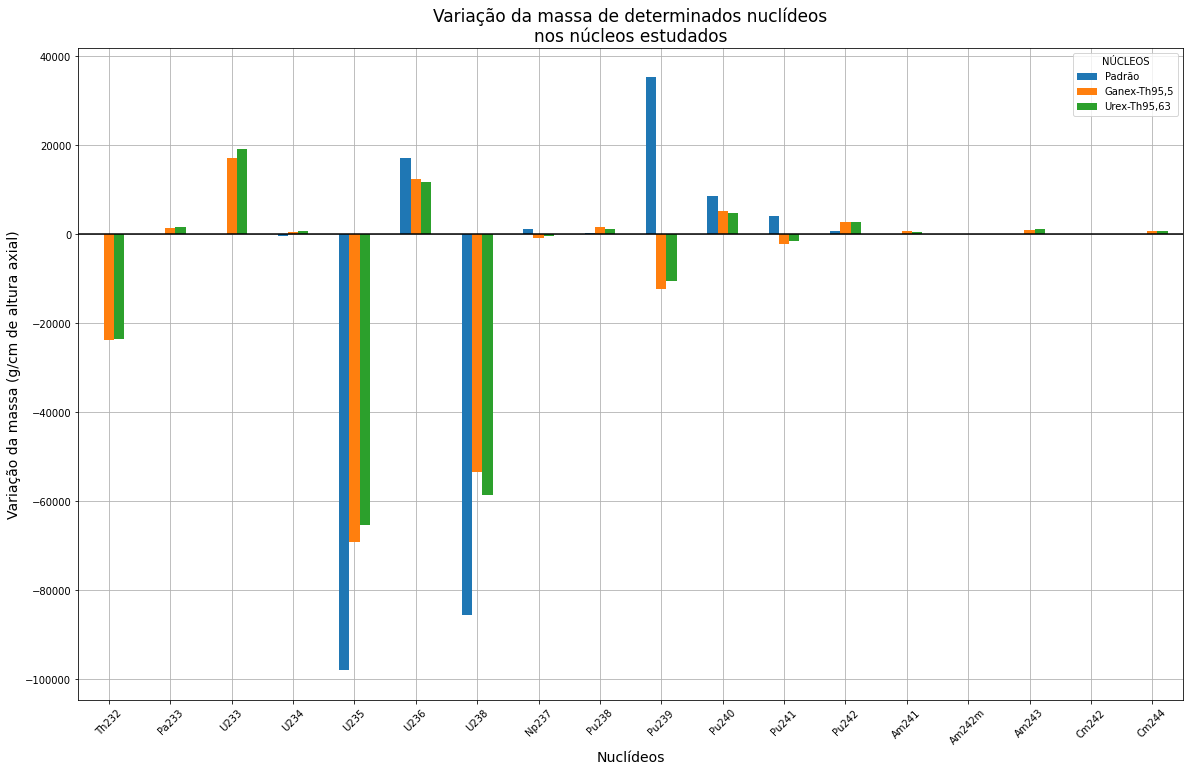

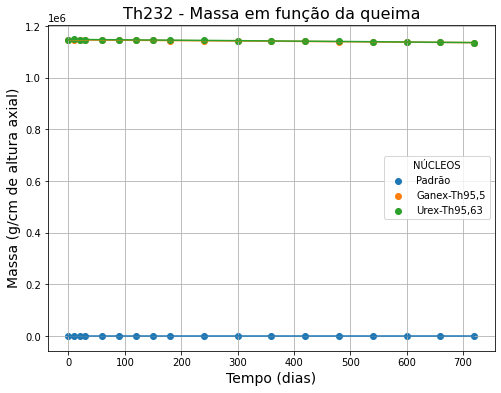

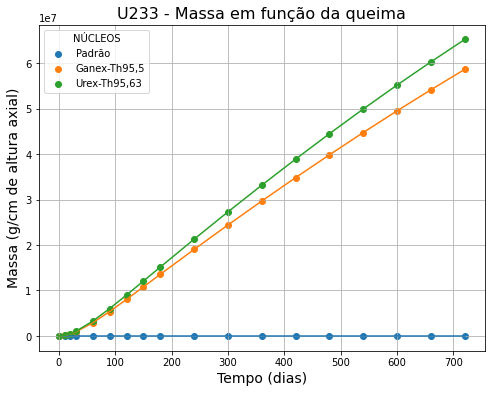

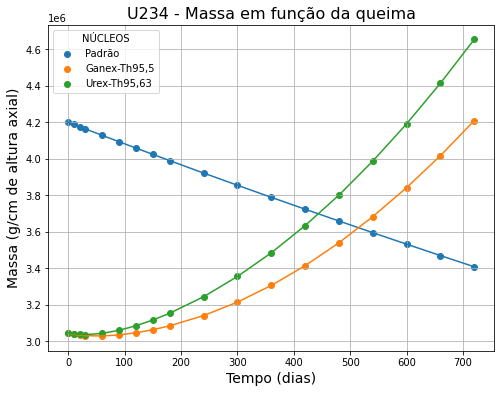

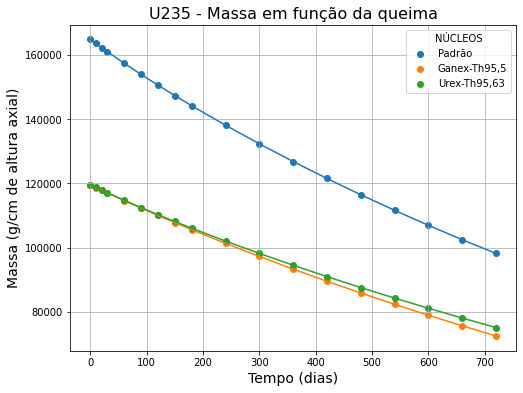

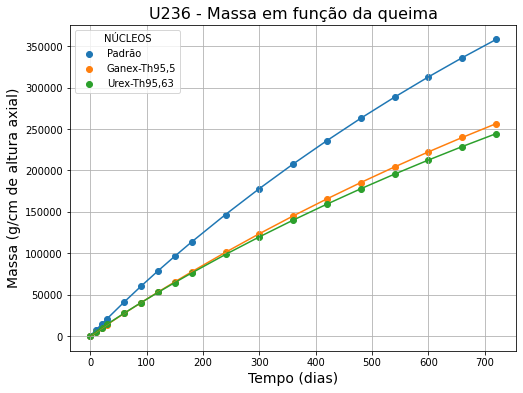

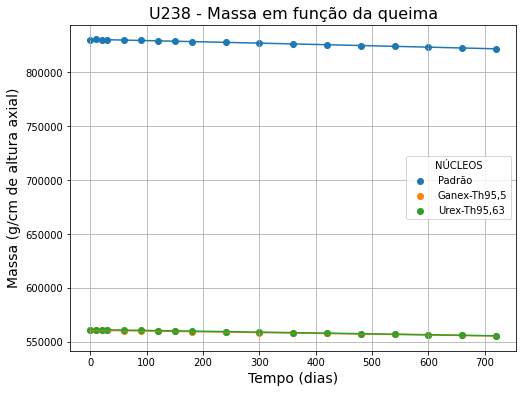

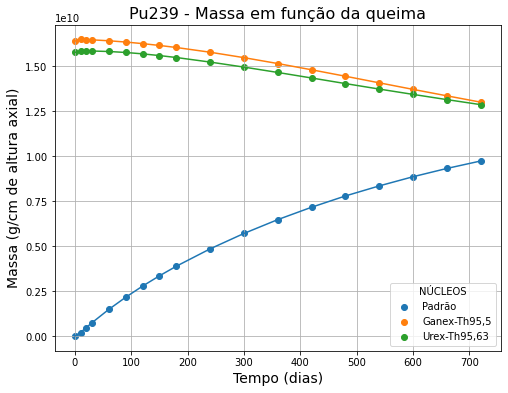

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##############################################################################
####         TRATAMENTO DE DADOS DOS ARQUIVOS DE SAÍDA DO SERPENT         ####
##############################################################################

print('####################################################\nTRATAMENTO DE DADOS DOS ARQUIVOS DE SAÍDA DO SERPENT\n####################################################\n')
print('Este programa foi desenvolvido com o intuito de realizar\no tratamento de dados dos arquivos de saída _dep.m e _res.m do Serpent.\n')

print('Certifique-se que que esses arquivos foram importados no\nambiente de execução e estão renomeados de acordo com o nome escolhido para o(s) núcleo(s).\nSe necessário, renomei-os.')

# ATENÇÃO: importar no ambiente de execução os arquivos '_dep.m' e '_res.m' a serem analisados

# inserir nuclídeos que terão a variação da massa (final - inicial) analisada
nuclideos = ['Th232','Pa233','U233','U234','U235','U236','U238', 'Np237','Pu238','Pu239','Pu240','Pu241','Pu242','Am241','Am242m','Am243','Cm242','Cm244']

# inserir nuclídeos para os gráficos de massa vs queima
nuc = []

# inserir os nucleos de reatores estudados de acordo com os os nomes dos
# seus respectivos arquivos '_dep' e '_res.m'
# ex.: se o arquivo tem nome urex_Th90_dep.m  ---> inserir 'urex_Th90'
nucleos = []

##############################################################################

if len(nucleos) == 0:
  print("-> Inserir um a um o nome dos núcleos dos reatores a serem analisados\n   de acordo com seus respectivos arquivos de final '_dep.m' e '_res.m'.")
  print("   Ex.: se os arquivos têm nome urex_Th90_dep.m e urex_Th90_res.m ---> inserir urex_Th90,\n   que também será o nome do núcleo nas legendas dos gráficos.")
  print('   Insira . (ponto final) para encerrar.\n')
  k = input('   NÚCLEOS DOS REATORES:\n   ')
  while k != '.' and len(nucleos) < 4:
    nucleos.append(k)
    k = input('   ')
  print('')

if len(nuclideos) == 0:
  print("-> Inserir um a um os nuclídeos para o gráfico de variação de massa (final - inicial).\n   Ex.: U235, U238, Pu239...\n   Para encerrar, insira . (ponto final).\n")
  o = input('   NUCLÍDEOS:\n   ')
  while o != '.':
    nuc.append(o)
    o = input('   ')
  print('')

if len(nuc) == 0:
  print("-> Inserir um a um os nuclídeos para os gráficos de massa em função da queima ou do tempo.\n   Ex.: U235, U238, Pu239...\n   Para encerrar, insira . (ponto final).\n")
  o = input('   NUCLÍDEOS:\n   ')
  while o != '.':
    nuc.append(o)
    o = input('   ')
  print('')

eixo_x = input('-> Plotar gŕaficos em função da queima ou em função do tempo:\n   1= Queima     2= Tempo\n   ')
print(' \n ')

def remove_repetidos(lista):
    l = []
    for i in lista:
        if i not in l:
            l.append(i)
    return l

nuclideos = remove_repetidos(nuclideos)
nuc = remove_repetidos(nuc)

#################################################
##################   GRÁFICOS   #################
#################################################

#####################
#       K-Eff       #
#####################

fig = plt.figure(figsize=(8,6))
fig.add_subplot()

for nucleo in nucleos:
  imp_keff = []
  erro = []
  dados1 = open(nucleo + '_res.m','r')
  for linha in dados1:
    linha = linha.split()
    if 'IMP_KEFF' in linha:
      del linha[:+6]
      del linha[-1:]
      imp_keff.append(float(linha[0]))
      erro.append(float(linha[1]))
  dados2 = open(nucleo + '_dep.m','r')
  if eixo_x == '1':
    for linha in dados2:
      linha = linha.split()
      if 'BU' in linha:
        BU = linha
        x = []
        del BU[:+3]
        del BU[-1:]
        for i in BU:
          x.append(float(i))
  if eixo_x == '2':
    for linha in dados2:
      linha = linha.split()
      if 'DAYS' in linha:
        DAYS = linha
        x = []
        del DAYS[:+3]
        del DAYS[-1:]
        for i in DAYS:
          x.append(float(i))

  plt.scatter(x, imp_keff, label = nucleo)
  plt.plot(x, imp_keff)
  #plt.errorbar(x, imp_keff, yerr=erro, fmt="o")

plt.title('Fator de multiplicação em função da queima',fontsize=16)
plt.legend(title='NÚCLEOS')
if eixo_x == '1':
  plt.xlabel('Burnup (MWd/kgU)',fontsize=14)
if eixo_x == '2':
  plt.xlabel('Tempo (dias)',fontsize=14)
plt.ylabel('K-eff Implícito',fontsize=14)
#plt.axhline(0, color='k')
plt.grid()
plt.show()
print('')


#######################
# TOTAL FISSION RATE  #
#######################

fig = plt.figure(figsize=(8,6))
fig.add_subplot()

for nucleo in nucleos:
  fiss = []
  dados1 = open(nucleo + '_res.m','r')
  for linha in dados1:
    linha = linha.split()
    if 'TOT_FISSRATE' in linha:
      del linha[:+6]
      del linha[-6:]
      fiss.append(float(linha[0]))
  dados2 = open(nucleo + '_dep.m','r')
  if eixo_x == '1':
    for linha in dados2:
      linha = linha.split()
      if 'BU' in linha:
        BU = linha
        x = []
        del BU[:+3]
        del BU[-1:]
        for i in BU:
          x.append(float(i))
  if eixo_x == '2':
    for linha in dados2:
      linha = linha.split()
      if 'DAYS' in linha:
        DAYS = linha
        x = []
        del DAYS[:+3]
        del DAYS[-1:]
        for i in DAYS:
          x.append(float(i))
  plt.scatter(x, fiss, label = nucleo)
  plt.plot(x, fiss)

plt.title('Taxa total de fissão em função da queima',fontsize=16)
plt.legend(title='NÚCLEOS')
if eixo_x == '1':
  plt.xlabel('Burnup (MWd/kgU)',fontsize=14)
if eixo_x == '2':
  plt.xlabel('Tempo (dias)',fontsize=14)
plt.ylabel('Taxa de fissão',fontsize=14)
#plt.axhline(0, color='k')
plt.grid()
plt.show()
print('')

#######################
# TOTAL CAPTURE RATE  #
#######################

fig = plt.figure(figsize=(8,6))
fig.add_subplot()

for nucleo in nucleos:
  capt = []
  dados1 = open(nucleo + '_res.m','r')
  for linha in dados1:
    linha = linha.split()
    if 'TOT_CAPTRATE' in linha:
      del linha[:+6]
      del linha[-6:]
      capt.append(float(linha[0]))
  dados2 = open(nucleo + '_dep.m','r')
  if eixo_x == '1':
    for linha in dados2:
      linha = linha.split()
      if 'BU' in linha:
        BU = linha
        x = []
        del BU[:+3]
        del BU[-1:]
        for i in BU:
          x.append(float(i))
  if eixo_x == '2':
    for linha in dados2:
      linha = linha.split()
      if 'DAYS' in linha:
        DAYS = linha
        x = []
        del DAYS[:+3]
        del DAYS[-1:]
        for i in DAYS:
          x.append(float(i))
  plt.scatter(x, capt, label = nucleo)
  plt.plot(x, capt)

plt.title('Taxa total de captura em função da queima',fontsize=16)
plt.legend(title='NÚCLEOS')
if eixo_x == '1':
  plt.xlabel('Burnup (MWd/kgU)',fontsize=14)
if eixo_x == '2':
  plt.xlabel('Tempo (dias)',fontsize=14)
plt.ylabel('Taxa de captura',fontsize=14)
#plt.axhline(0, color='k')
plt.grid()
plt.show()
print('')


###########################
# FLUXO TOTAL DE NEUTRONS #
###########################

fig = plt.figure(figsize=(8,6))
fig.add_subplot()

for nucleo in nucleos:
  n_flux = []
  dados1 = open(nucleo + '_res.m','r')
  for linha in dados1:
    linha = linha.split()
    if 'TOT_FLUX' in linha:
      del linha[:+6]
      del linha[-6:]
      n_flux.append(float(linha[0]))
  dados2 = open(nucleo + '_dep.m','r')
  if eixo_x == '1':
    for linha in dados2:
      linha = linha.split()
      if 'BU' in linha:
        BU = linha
        x = []
        del BU[:+3]
        del BU[-1:]
        for i in BU:
          x.append(float(i))
  if eixo_x == '2':
    for linha in dados2:
      linha = linha.split()
      if 'DAYS' in linha:
        DAYS = linha
        x = []
        del DAYS[:+3]
        del DAYS[-1:]
        for i in DAYS:
          x.append(float(i))
  plt.scatter(x, n_flux, label = nucleo)
  plt.plot(x, n_flux)

plt.title('Fluxo total de neutrons em função da queima',fontsize=16)
plt.legend(title='NÚCLEOS')
if eixo_x == '1':
  plt.xlabel('Burnup (MWd/kgU)',fontsize=14)
if eixo_x == '2':
  plt.xlabel('Tempo (dias)',fontsize=14)
plt.ylabel('Fluxo de neutrons',fontsize=14)
#plt.axhline(0, color='k')
plt.grid()
plt.show()
print('')


#######################
# INHALATION TOXICITY #
#######################

fig = plt.figure(figsize=(8,6))
fig.add_subplot()

for nucleo in nucleos:
  inh_tox = []
  dados1 = open(nucleo + '_res.m','r')
  for linha in dados1:
    linha = linha.split()
    if 'INHALATION_TOXICITY' in linha:
      del linha[:+4]
      del linha[-1:]
      inh_tox.append(float(linha[0]))
  dados2 = open(nucleo + '_dep.m','r')
  if eixo_x == '1':
    for linha in dados2:
      linha = linha.split()
      if 'BU' in linha:
        BU = linha
        x = []
        del BU[:+3]
        del BU[-1:]
        for i in BU:
          x.append(float(i))
  if eixo_x == '2':
    for linha in dados2:
      linha = linha.split()
      if 'DAYS' in linha:
        DAYS = linha
        x = []
        del DAYS[:+3]
        del DAYS[-1:]
        for i in DAYS:
          x.append(float(i))
  plt.scatter(x, inh_tox, label = nucleo)
  plt.plot(x, inh_tox)

plt.title('Radiotoxicidade por inalação\nem função da queima',fontsize=16)
plt.legend(title='NÚCLEOS')
if eixo_x == '1':
  plt.xlabel('Burnup (MWd/kgU)',fontsize=14)
if eixo_x == '2':
  plt.xlabel('Tempo (dias)',fontsize=14)
plt.ylabel('Radiotoxicidade por inalação (Sv)',fontsize=14)
#plt.axhline(0, color='k')
plt.grid()
plt.show()
print('')

#######################
# INGESTION TOXICITY  #
#######################

fig = plt.figure(figsize=(8,6))
fig.add_subplot()

for nucleo in nucleos:
  ing_tox = []
  dados1 = open(nucleo + '_res.m','r')
  for linha in dados1:
    linha = linha.split()
    if 'INGESTION_TOXICITY' in linha:
      del linha[:+4]
      del linha[-1:]
      ing_tox.append(float(linha[0]))
  dados2 = open(nucleo + '_dep.m','r')
  if eixo_x == '1':
    for linha in dados2:
      linha = linha.split()
      if 'BU' in linha:
        BU = linha
        x = []
        del BU[:+3]
        del BU[-1:]
        for i in BU:
          x.append(float(i))
  if eixo_x == '2':
    for linha in dados2:
      linha = linha.split()
      if 'DAYS' in linha:
        DAYS = linha
        x = []
        del DAYS[:+3]
        del DAYS[-1:]
        for i in DAYS:
          x.append(float(i))
  plt.scatter(x, ing_tox, label = nucleo)
  plt.plot(x, ing_tox)

plt.title('Radiotoxicidade por ingestão\nem função da queima',fontsize=16)
plt.legend(title='NÚCLEOS')
if eixo_x == '1':
  plt.xlabel('Burnup (MWd/kgU)',fontsize=14)
if eixo_x == '2':
  plt.xlabel('Tempo (dias)',fontsize=14)
plt.ylabel('Radiotoxicidade por ingestão (Sv)',fontsize=14)
#plt.axhline(0, color='k')
plt.grid()
plt.show()
print('')


#####################
# VARIAÇÃO DA MASSA #
#####################

dados_finais = {}

print('\nVARIAÇÕES DAS MASSAS (FINAL - INICIAL):')
for nucleo in nucleos:
  dados = open(nucleo + '_dep.m','r')
  var_massa = []
  check = 0
  for linha in dados:
    linha = linha.split()
    if 'TOT_MASS' in linha:
      check += 1
    if check == 1:
      for nuclideo in nuclideos:
        if nuclideo in linha:
          var = float(linha[len(linha)-3]) - float(linha[0])
          var_massa.append([nuclideo, var])
      if 'total' in linha:
        dados_finais[nucleo] = var_massa
        break

m = len(nucleos)
n = len(var_massa)
data = []
for nucleo in nucleos:
  data.append(dados_finais[nucleo])

if m == 1:
  NV = []
  for i in var_massa:
    NV.append([i[0]])
  for i in range(m):
    for j in range(n):
      NV[j].append(data[i][j][1])
  c = ['Nuclídeos']
  for i in nucleos:
    c.append(i)
  DF = pd.DataFrame(NV, columns = c)
  if n <= 4:
    ax = DF.plot(x='Nuclídeos',kind='bar',stacked=False,figsize=(9,7),rot=0)
  if n > 4:
    ax = DF.plot(x='Nuclídeos',kind='bar',stacked=False,figsize=(1*n,7),rot=0)
  plt.title('Variação da massa de determinados nuclídeos\nno núcleo '+nucleos[0],fontsize=17)

if m >= 2:
  NV = []
  for i in var_massa:
    NV.append([i[0]])
  for i in range(m):
    for j in range(n):
      NV[j].append(data[i][j][1])
  c = ['Nuclídeos']
  for i in nucleos:
    c.append(i)
  DF = pd.DataFrame(NV, columns = c)
  if n <= 4:
    ax = DF.plot(x='Nuclídeos',kind='bar',stacked=False,figsize=(9,7),rot=0)
  if n > 4:
    ax = DF.plot(x='Nuclídeos',kind='bar',stacked=False,figsize=(1.1*n,12),rot=45)
  plt.title('Variação da massa de determinados nuclídeos\nnos núcleos estudados',fontsize=17)
  plt.legend(title='NÚCLEOS')
  
print('\n',DF,'\n')

plt.xlabel('Nuclídeos',fontsize=14)
plt.ylabel('Variação da massa (g/cm de altura axial)',fontsize=14)
plt.axhline(0, color='k')
ax.set_axisbelow(True)
plt.grid()


#####################################
# MASSA EM FUNÇÃO DA QUEIMA / TEMPO #
#####################################
          
for nuclideo in nuc:
  fig = plt.figure(figsize=(8,6))
  fig.add_subplot()
  for nucleo in nucleos:
    dados = open(nucleo + '_dep.m','r')
    check = 0
    for linha in dados:
      linha = linha.split()
      if 'TOT_MASS' in linha:
        check += 1
      if check == 1:
        if nuclideo in linha:
          mas = linha
          massa = []
          del mas[-2:]
          for i in mas:
            massa.append(float(i))
        if eixo_x == '1':
          if 'BU' in linha:
            BU = linha
            x = []
            del BU[:+3]
            del BU[-1:]
            for i in BU:
              x.append(float(i))
        if eixo_x == '2':
          if 'DAYS' in linha:
            DAYS = linha
            x = []
            del DAYS[:+3]
            del DAYS[-1:]
            for i in DAYS:
              x.append(float(i))

    plt.scatter(x, massa, label = nucleo)
    plt.plot(x, massa)

  plt.title(nuclideo + ' - Massa em função da queima',fontsize=16)
  plt.legend(title='NÚCLEOS')
  if eixo_x == '1':
    plt.xlabel('Burnup (MWd/kgU)',fontsize=14)
  if eixo_x == '2':
    plt.xlabel('Tempo (dias)',fontsize=14)
  plt.ylabel('Massa (g/cm de altura axial)',fontsize=14)
  #plt.axhline(0, color='k')
  plt.grid()
  plt.show()